#### Aproximaciones numéricas a la derivada de una función en un punto

Recordemos que $$f'(x _{0}) := \displaystyle \lim _{h\to 0} \frac{f(x _{0}  + h) - f(x _{0} )}{h}  $$ 
lo que indica que con $h$ suficientemente chico, se puede lograr que $$f'(x _{0}) \approx \frac{f(x _{0}  + h) - f(x _{0} )}{h} $$ 
Dicha aproximación es conocida como aproximación hacia adelante o aproximación tipo `forward`.

Existen también, aproximaciones tipo hacia atrás (`backward`) y tipo centradas (`centered`):
$$f'(x _{0}) \approx \displaystyle  \frac{f(x _{0}) - f(x _{0} -h)}{h} $$
$$f'(x _{0}) \approx \displaystyle  \frac{f(x _{0}+h) - f(x _{0} -h)}{2h} $$

A continuación verá funciones de python emulando dichas aproximaciones.

In [1]:
import numpy as np
import sympy as sy

In [2]:
def forward_local1(f, x0, h):
    return (1/h) * (f(x0+h) - f(x0))

def backward_local1(f, x0, h):
    return (1/h) * (f(x0) - f(x0-h))

def centered_local(f, x0, h):
    return (1/(2*h)) * (f(x0+h) - f(x0-h))


In [3]:
x = sy.symbols('x')
f_expr = x ** 2
f = sy.lambdify(x, f_expr, "numpy")

In [6]:
forward_local1(f, 1, 0.01)
backward_local1(f, 1, 0.01)
centered_local(f, 1, 0.01)


2.0000000000000018

#### Aproximaciones a la derivada de una función en un intervalo

Si $f: [a,b]\to \mathbb{R}$ es una función derivable en $(a,b)$. Se puede subdividir el intervalo $[a,b]$ usando la partición $x _{0} =  a, x _{1} =  a+h,  x _{2} = a+2h, \  \cdots, \  b$. Se considera al muestreo de $f$ como los valores $f(x _{0}), f(x _{ 1} ), \cdots, f(x _{k} ), \cdots $.

Note que $f'(x _{k}) \approx \displaystyle \frac{f(x _{k+1} ) - f(x _{k} )}{h} $, $f'(x _{k}) \approx \displaystyle \frac{f(x _{k} ) - f(x _{k-1} )}{h} $ y $f'(x _{k}) \approx \displaystyle \frac{f(x _{k+1} ) - f(x _{k-1} )}{2h} $ son las formas locales de aproximación a la derivada de $f $ en culaquier punto $x _{k} $. 

Matricialmente:

$$\frac{1}{h} \begin{bmatrix}
1 & -1 & \ & \ \\
\ &  1 & -1 & \ \\
\ & \ & 1 & -1 \\
\ & \ & \ & \ddots \\
\ & \ & \ & \ \\
\ & \ & \ & \ \\
\end{bmatrix}

\begin{bmatrix}
f(x _{0} ) \\
f(x _{1} ) \\
\vdots \\
f(x _{k-1}) \\
f(x _{k}) \\
f(x _{k+1}) \\
\vdots \\
\end{bmatrix}
\approx 

\begin{bmatrix}
f'(x _{ 1} )\\
f'(x _{ 2} )\\
\vdots \\
f'(x _{k } )\\
\vdots 
\end{bmatrix} \quad \quad \text{backward global}$$ 



$$\frac{1}{h} \begin{bmatrix}
1 & \ & \ & \ \\
-1 &  1 & \ & \ \\
\ & -1 & 1 & \ \\
\ & \ & \ & \ddots \\
\ & \ & \ & \ \\
\ & \ & \ & \ \\
\end{bmatrix}

\begin{bmatrix}
f(x _{0} ) \\
f(x _{1} ) \\
\vdots \\
f(x _{k-1}) \\
f(x _{k}) \\
f(x _{k+1}) \\
\vdots \\
\end{bmatrix}
\approx 

\begin{bmatrix}
- \\
f'(x _{ 1} )\\
f'(x _{ 2} )\\
\vdots \\
f'(x _{k } )\\
\vdots 
\end{bmatrix}  \quad \quad \text{forward global}$$ 


$$\frac{1}{2h} \begin{bmatrix}
0 & 1 & \ & \ \\
-1 &  0 & 1 & \ \\
\ & -1 & 0 & 1 \\
\ & \ & \ & \ddots \\
\ & \ & \ & \ \\
\ & \ & \ & \ \\
\end{bmatrix}

\begin{bmatrix}
f(x _{0} ) \\
f(x _{1} ) \\
\vdots \\
f(x _{k-1}) \\
f(x _{k}) \\
f(x _{k+1}) \\
\vdots \\
\end{bmatrix}
\approx 

\begin{bmatrix}
- \\
f'(x _{ 1} )\\
f'(x _{ 2} )\\
\vdots \\
f'(x _{k } )\\
\vdots 
\end{bmatrix}  \quad \quad \text{centered global}$$ 

a continuación verá funciones en python emulando aproximaciones globales:

In [12]:

def forward(f, x):
    """ Entradas: f es función, x es un arreglo
        Salida: arreglo de aproximaciones a la derivada"""
    n = len(x)
    h = x[1] - x[0]
    D = np.fromfunction(lambda i,j: (-1)*(i==j) + (1)*((j-i)==1), (n,n))
    return (1/h) * (D @ f(x))


def backward(f, x):
    n = len(x)
    h = x[1] - x[0]
    D = np.fromfunction(lambda i,j: (1)*(i==j) + (-1)*((i-j)==1), (n,n))
    return (1/h) * (D @ f(x))

def centered(f, x):
    n = len(x)
    h = x[1] - x[0]
    D = np.fromfunction(lambda i,j: (1)*((j-i)==1) + (-1)*((i-j)==1), (n,n))
    return (1/(2*h)) * (D @ f(x))

def centered_order4(f, x):
    n = len(x)
    h = x[1] - x[0]
    D = np.fromfunction(lambda i,j: 8*((j-i)==1)-8*((i-j)==1)+1*((i-j)==2)-1*((j-i)==2), (n,n))
    return (1/(12*h)) * (D @ f(x))

In [17]:
x = sy.symbols('x')
f_expr = x ** 2
f = sy.lambdify(x, f_expr, "numpy")
dominio = np.linspace(0,1)

In [18]:
aprox1 = forward(f, dominio)
aprox2 = backward(f, dominio)
aprox3 = centered(f, dominio)

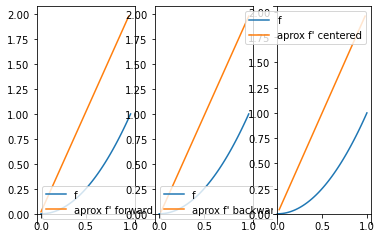

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3)
plt.subplot(131)
axe = plt.gca()
axe.plot(dominio, f(dominio), label="f")
axe.plot(dominio[:-1], aprox1[:-1], label="aprox f' forward")
axe.spines['bottom'].set_position("zero")
plt.legend(loc='lower left')
plt.subplot(132)
axe = plt.gca()
axe.plot(dominio, f(dominio), label="f")
axe.plot(dominio[1:], aprox2[1:], label="aprox f' backward")
axe.spines['bottom'].set_position("zero")
plt.legend(loc='lower left')
plt.subplot(133)
axe = plt.gca()
axe.plot(dominio, f(dominio), label="f")
axe.plot(dominio[1:-1], aprox3[1:-1], label="aprox f' centered")
axe.spines['bottom'].set_position("zero")
axe.spines['left'].set_position("zero")
plt.legend()
plt.show()


#### Taller

1) Construya en `sympy` una expresión simbólica que represente a $f(x) = (\sin (x) + 1) ^{\sin (\cos (x))} $ y calcule su derivada simbólicamente.
Grafique sobre el intervalo $[-\pi, \pi]$ a la funci\'on $f$ y a su derivada $f'$ además del eje $x$ usando el comando `ax.spines["bottom"].set_position("zero")` que le permita interpretar el signo de la derivada y su relación con el crecimiento o decrecimiento de $f$.  

2) Use forward_local1 y backward_local1 para crear aproximaciones a la derivada de $f(x) = \sin x$ en los puntos $x _{0} =0.5, \ x _{0}  = 0.6$ y $x _{0} = 0.7 $, tomando $h = 10 ^{-4} $. 

3) Use forward_local1 y backward_local1 para crear aproximaciones a la derivada de
 $f(x) = e ^{x} - 2 x ^{ 2} + 3x-1 $ en los puntos $x _{0} =0, \ x _{0}  = 0.2$ y $x _{0} = 0.4 $, tomando $h = 10 ^{-5} $.

4) Construya funciones de python que le permitan construir aproximaciones locales a la derivada de una función en un punto teniendo en cuenta las siguientes relaciones:

$$f'(x) \approx \displaystyle \frac{-3f(x _{0})+ 4 f(x _{0}+h) - f(x _{0} + 2h )}{2h} \quad \text{forwardlocal2} $$

$$f'(x) \approx \displaystyle \frac{3f(x _{0})- 4 f(x _{0}-h) - f(x _{0} - 2h )}{2h} \quad \text{backwardlocal2} $$

$$f'(x) \approx \displaystyle \frac{f(x _{0} - 2h ) - 8 f (x _{0} -h ) + 8 f (x _{0} + h ) - f( x _{0} + 2h )}{12h} \quad \text{centeredlocal4} $$